<a href="https://colab.research.google.com/github/ImranRiazChohan/PIMA-diabetes-/blob/master/PIMA_DIABETES_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PIMA DIABETES PROJECT

## import some usefull libraries

In [0]:
import keras
from keras import models
from keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import optimizers
from pandas import  DataFrame,Series
from sklearn.model_selection import train_test_split

## upload data using Google.Colab

In [66]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (1).csv


## read data 

In [0]:
diabetes_data=pd.read_csv("diabetes.csv",delimiter=",")

## Data divide into two parts(input_data , Output_data)

In [0]:
X=diabetes_data.iloc[:,0:8]
Y=diabetes_data.iloc[:,8]

## Split data int train and test data

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

## Define Model

In [0]:
def diabetes_model():
    model=models.Sequential()
    model.add(layers.Dense(12,activation='relu',input_shape=(8,)))
    model.add(layers.Dense(8,activation='relu'))
    model.add(layers.Dense(1,activation="sigmoid"))
    model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])
    return model


## Validation Data

In [0]:
X_val=X_train[:700]
Y_val=Y_train[:700]

## Train Model

In [72]:
diabetes_model=diabetes_model()
history=diabetes_model.fit(X_train,Y_train,epochs=150,batch_size=10,validation_data=(X_val,Y_val))

Train on 576 samples, validate on 576 samples
Epoch 1/150
576/576 [==============================] - 1s 1ms/step - loss: 5.5505 - acc: 0.6458 - val_loss: 5.1515 - val_acc: 0.6406
Epoch 2/150
576/576 [==============================] - 0s 195us/step - loss: 4.9879 - acc: 0.6372 - val_loss: 4.5481 - val_acc: 0.6215
Epoch 3/150
576/576 [==============================] - 0s 179us/step - loss: 4.1978 - acc: 0.6181 - val_loss: 3.8340 - val_acc: 0.5903
Epoch 4/150
576/576 [==============================] - 0s 181us/step - loss: 2.1994 - acc: 0.5278 - val_loss: 1.8109 - val_acc: 0.4531
Epoch 5/150
576/576 [==============================] - 0s 182us/step - loss: 1.3326 - acc: 0.5365 - val_loss: 1.1488 - val_acc: 0.5764
Epoch 6/150
576/576 [==============================] - 0s 191us/step - loss: 1.1138 - acc: 0.6059 - val_loss: 1.0386 - val_acc: 0.5660
Epoch 7/150
576/576 [==============================] - 0s 187us/step - loss: 1.0251 - acc: 0.5885 - val_loss: 0.9322 - val_acc: 0.6076
Epoch 8/150

In [77]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

## Evaluate Model

In [79]:
Result=diabetes_model.evaluate(X_test,Y_test)
Result

192/192 [==============================] - 0s 55us/step


[0.6336386104424795, 0.7395833333333334]

## Predict Model

In [81]:
predict=diabetes_model.predict(X_test)
predict

array([[0.10452002],
       [0.13841751],
       [0.6613668 ],
       [0.08668503],
       [0.14439654],
       [1.        ],
       [0.09504214],
       [0.40467685],
       [0.6464708 ],
       [0.09467563],
       [0.49414963],
       [0.17670357],
       [0.36485618],
       [0.06860152],
       [0.10653347],
       [0.12839279],
       [0.35501155],
       [0.43536368],
       [0.3234322 ],
       [0.05794209],
       [0.30801255],
       [0.04888386],
       [0.07586372],
       [0.14041972],
       [0.38878113],
       [0.8370006 ],
       [0.30315223],
       [0.0942609 ],
       [0.11966488],
       [0.10966557],
       [0.08779019],
       [0.10217595],
       [0.15457559],
       [0.77081835],
       [0.23083612],
       [0.22452098],
       [0.5750329 ],
       [0.09278619],
       [0.07039437],
       [0.3248374 ],
       [0.25291088],
       [0.05965629],
       [0.4323739 ],
       [0.5070812 ],
       [0.5651569 ],
       [0.63471615],
       [0.5598075 ],
       [0.355

## Ploting the Graph of Loss & Accuracy

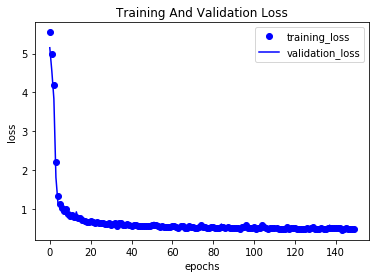

In [82]:
loss_value=history_dict["loss"]
val_loss_value=history_dict["val_loss"]
plt.plot(diabetes_model.history.epoch,loss_value,'bo',label="training_loss")
plt.plot(diabetes_model.history.epoch,val_loss_value,'b',label="validation_loss")
plt.title("Training And Validation Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

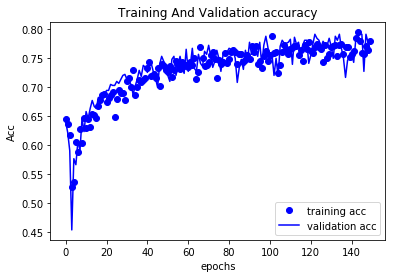

In [84]:
acc_value=history_dict["acc"]
val_acc_value=history_dict["val_acc"]

plt.plot(diabetes_model.history.epoch,acc_value,'bo',label="training acc")
plt.plot(diabetes_model.history.epoch,val_acc_value,'b',label="validation acc")
plt.title("Training And Validation accuracy")
plt.xlabel("epochs")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [85]:
diabetes_model.save('diabetes_model.h5')
from keras.models import load_model
model=load_model("diabetes_model.h5")
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
